In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
# scipy.optimize example
# a vector function ℝ²⇨ℝ²
def fv(x):
    return [x[0] + 0.5 * (x[0] - x[1])**3 - 1.0, 0.5 * (x[1] - x[0])**3 + x[1]]

# version ℝ²⇨ℝ, returns square(module), for plotting
def fs(p):
    k = fv(p)
    return k[0]*k[0]+k[1]*k[1]

min= (0.8383838383838385, 0.1515151515151516)


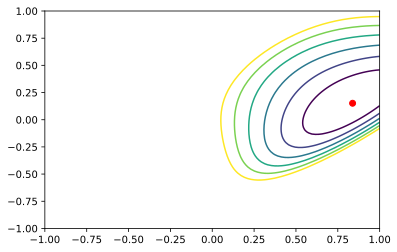

In [6]:
# Draw on [-1,1]x[-1,1]
points = np.linspace(-1,1,100)
xs, ys = np.meshgrid(points, points)
v = np.array([fs(p) for p in zip(xs.flatten(), ys.flatten())]).reshape(100,100)
# Get [ix,iy] coords of the minimum for all points where ix and ix are indexes 
minixiy = np.unravel_index(v.argmin(), v.shape)
minxy = points[minixiy[1]], points[minixiy[0]]
print("min=",mi)
# Clipping data to {-1,1} range makes the graph more interesting
v=v.clip(-1,1)
plt.plot(mi[0],mi[1],"o",color='red')
_=plt.contour(points,points,v)

In [7]:
# Now the quick version with scipy...
from scipy import optimize
x0 = [0,0]
sol = optimize.root(fv, x0)
print(sol.x)
print(sol.success)

[0.8411639 0.1588361]
True


In [32]:
# Exercise
# Create a matrix (A) of random entries (your choice on distribution) with m > n (more rows than columns).
# Create a column vector B in R^m.
# Find x that minimizes |Ax − b|^2. What is the norm of the residual?
m = 10
n = 5
A = np.random.rand(m,n)
B = np.random.rand(m,1)
x, residues, rank, s = scipy.linalg.lstsq(A, B)
print(x, math.sqrt(residues[0]), sep='\n\n', end='\n\n')
C = np.dot(A,x)-B
n = scipy.linalg.norm(C)
print(n)


[[ 0.91897512]
 [-0.47296217]
 [ 0.34339334]
 [ 0.35033106]
 [-0.45421522]]

0.7202452524201578

0.720245252420158


In [33]:
# Invert matrix
from scipy import linalg
m = np.array([[1,2],[3,4]])
print("det=", linalg.det(m))
i = linalg.inv(m)
print("inv=", i)
print("m*m^-1=", np.dot(m,i))

det= -2.0
inv= [[-2.   1. ]
 [ 1.5 -0.5]]
m*m^-1= [[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]


In [47]:
# Eigen vectors and values
arr = np.arange(9).reshape((3, 3)) + np.diag([1, 0, 1])
#eigvals = linalg.eigvals(arr)
#print("eigvals:", eigvals, end='\n\n')
eigval, eigvect = linalg.eig(arr)
print("eigen values: ", eigval, end='\n\n')
#print(eigvect)
for i in range(3):
    v = eigvect[:,i].reshape(3,1)
    #print(v)
    print(np.dot(arr,v)/v)

eigen values:  [14.06100295+0.j -0.40887656+0.j  0.34787361+0.j]

[[14.06100295]
 [14.06100295]
 [14.06100295]]
[[-0.40887656]
 [-0.40887656]
 [-0.40887656]]
[[0.34787361]
 [0.34787361]
 [0.34787361]]


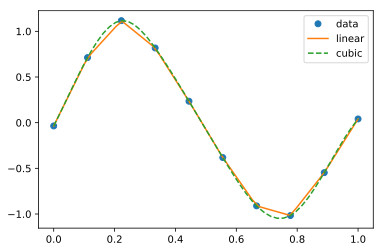

In [54]:
# Interpolation
from scipy.interpolate import interp1d
#scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists.
# The module is based on the FITPACK Fortran subroutines.
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 0.15
measures = np.sin(2 * np.pi * measured_time) + noise
linear_interp = interp1d(measured_time, measures)
cubic_interp = interp1d(measured_time, measures, kind = 'cubic')

# Plot
time = np.linspace(0, 1, 50)
lin_approx = linear_interp(time)
cub_approx = cubic_interp(time)
plt.plot(measured_time, measures, 'o', 
         time, lin_approx, '-', 
         time, cub_approx, '--')
_ = plt.legend(['data', 'linear', 'cubic'], loc='best')

In [57]:
# Find root of a vector function
def fv(x):
    return [x[0]*math.log10(x[0])-100]

sol = scipy.optimize.root(fv, [50])
print(sol)
x = sol.x
print(x**x)

    fjac: array([[-1.]])
     fun: array([9.09494702e-13])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([4.34154259e-07])
       r: array([-2.18986938])
  status: 1
 success: True
       x: array([56.96124843])
[1.e+100]
